In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
# First we look at target variable porportions
pd.crosstab(df['Purchased'], df['Purchased'], normalize='all')*100

Purchased,0,1
Purchased,,
0,64.25,0.00
1,0.00,35.75


In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
# drop not used columns
df.drop('User ID', axis=1, inplace=True)

In [14]:
# Dealing with categorical variables:
df['Gender']=np.where(df['Gender']=='Male',1,0)

In [15]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [16]:
# Rearange column order
df = df[['Purchased', 'Age', 'EstimatedSalary', 'Gender']]

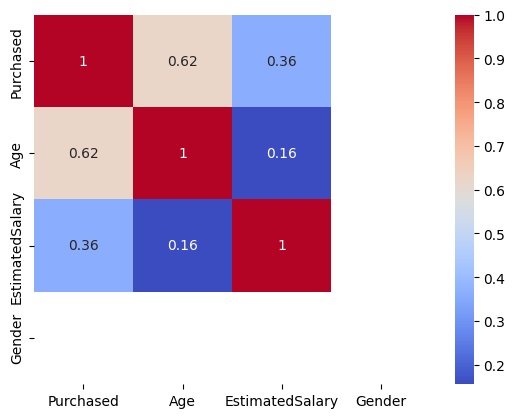

In [17]:
# useing heatmap to see the correlation between our features
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [18]:
# Defining the variables and splitting the data

y = df['Purchased'] # dependent features
X = df.drop('Purchased', axis=1) # independent features

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)
X_train.shape, X_test.shape

((280, 3), (120, 3))

In [8]:
# Decision Tree Classification with SKlearn
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
#importing required packages for visualization

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [24]:
# DOT data
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, feature_names=X.columns, class_names=['Purchased', 'Not Purchased'])

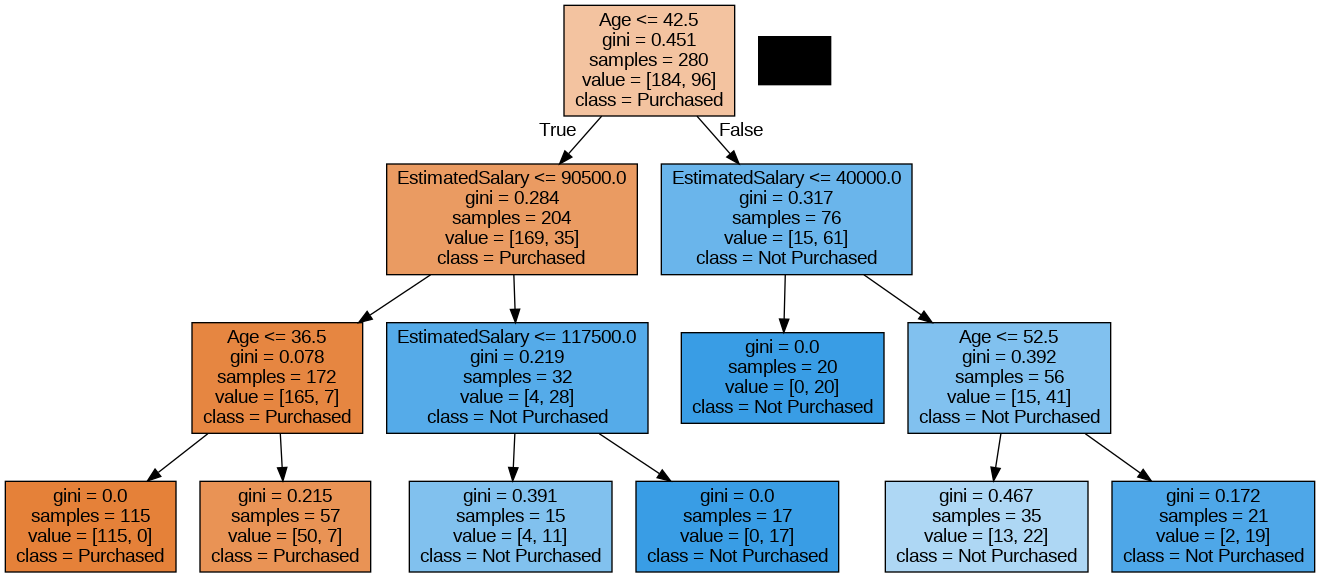

In [25]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [26]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [28]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)


0.9071428571428571


array([[165,  19],
       [  7,  89]])

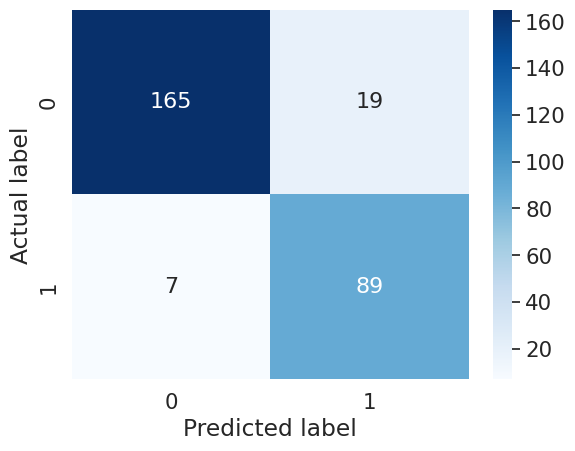

In [29]:
cm1 = confusion_matrix(y_train, y_train_pred)
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size":16}, fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [30]:
print("classification report -\n", classification_report(y_train, y_train_pred))

classification report -
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       184
           1       0.82      0.93      0.87        96

    accuracy                           0.91       280
   macro avg       0.89      0.91      0.90       280
weighted avg       0.91      0.91      0.91       280



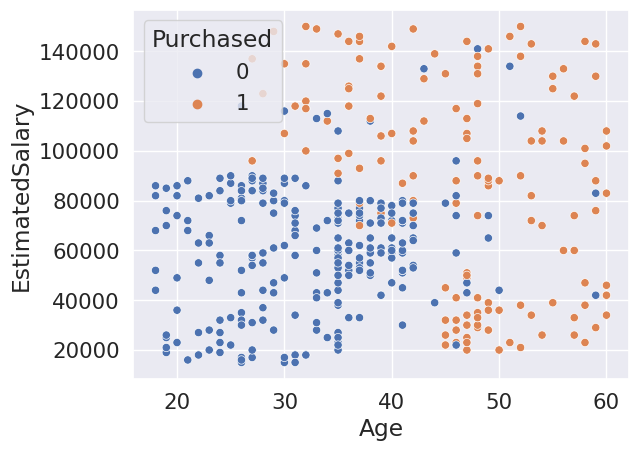

In [31]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')
plt.show()